In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/HW2Code/HW2-code')
import mltools as ml

##Problem1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("/content/drive/MyDrive/HW2Code/HW2-code/data/curve80.txt",delimiter=None) # load the text file


In [ ]:
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

##Problem1Part1

In [ ]:
print("The shape of Xtr is" , Xtr.shape)
print("The shape of Xte is" , Xte.shape)
print("The shape of Ytr is" , Ytr.shape)
print("The shape of Yte is" , Yte.shape)


The shape of Xtr is (60, 1)
The shape of Xte is (20, 1)
The shape of Ytr is (60,)
The shape of Yte is (20,)


##Problem1Part2

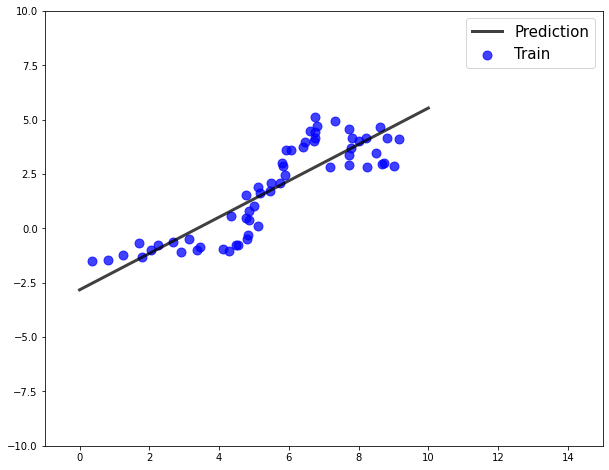

In [ ]:
# Parta
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values

xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
#print(xs)

ys = lr.predict( xs ) # make predictions at xs
#print(ys)


# Plotting the data

f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
# Also plotting the regression line
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')
ax.set_xlim(-1, 15)
ax.set_ylim(-10, 10)


# Controlling the size of the legend and the location.
ax.legend(fontsize=15, loc=1)

plt.show()

In [ ]:
#partb
lr.theta

array([[-2.82765049,  0.83606916]])

In [ ]:
#partc
#Since the mse function of lr defined in ml tools first predict based on X and find the difference of Ypredicted an Y
#We can use the mse directly
print(lr.mse(Xtr,Ytr)) #MSE on training set
print(lr.mse(Xte,Yte)) #MSE on test set

1.127711955609391
2.242349203010125


#Problem1Part3

1


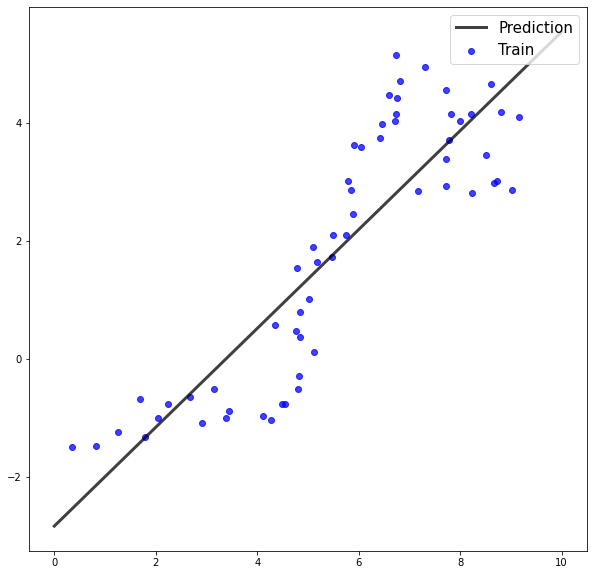

3


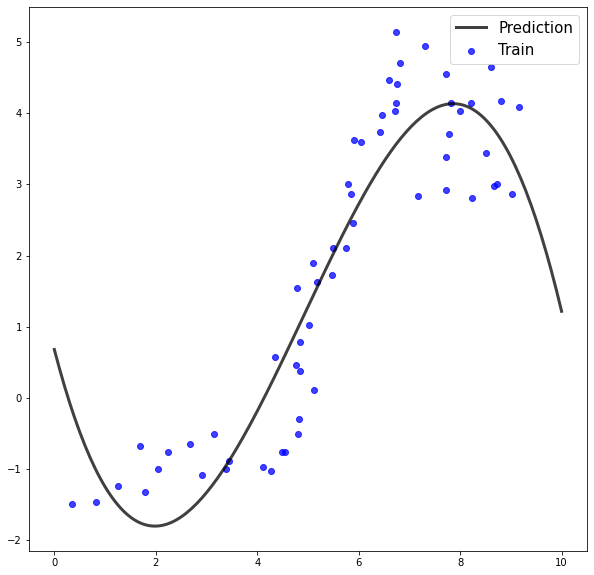

5


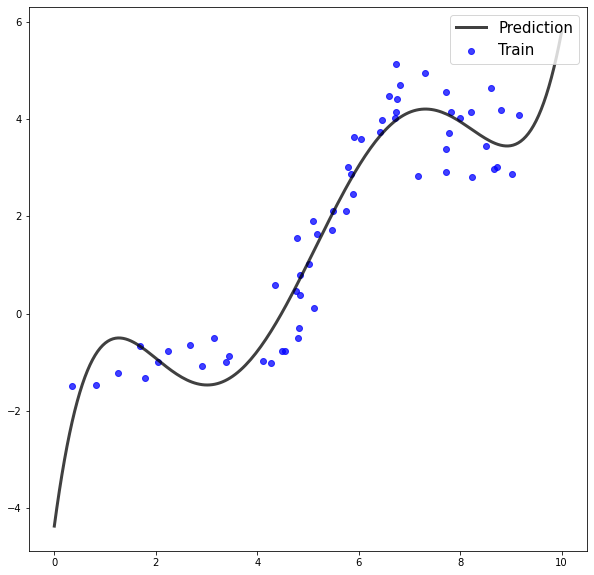

7


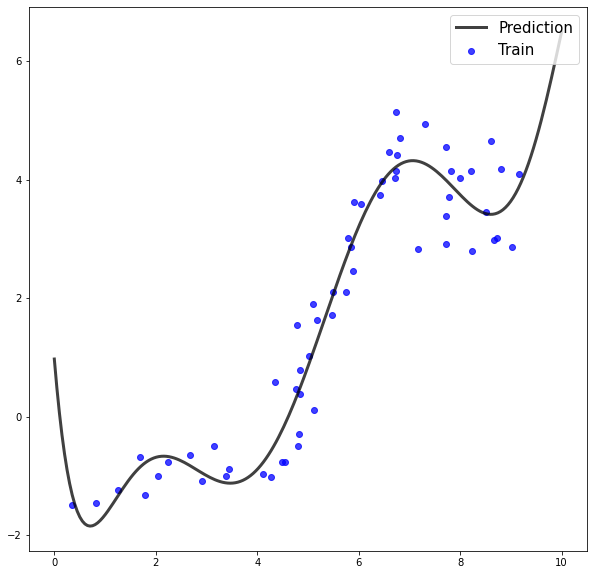

10


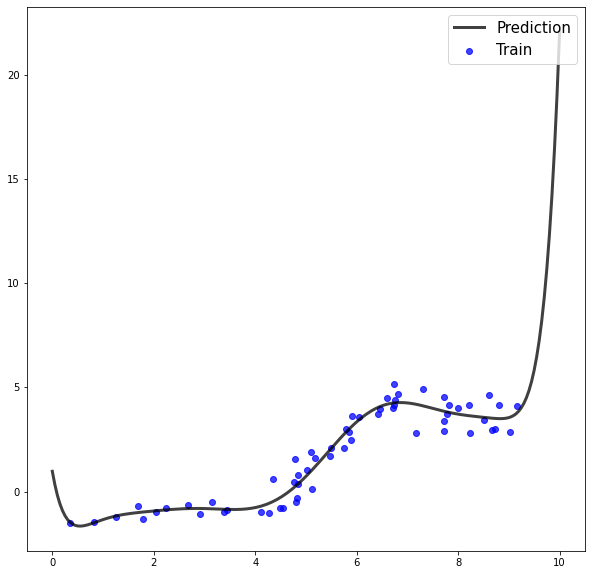

18


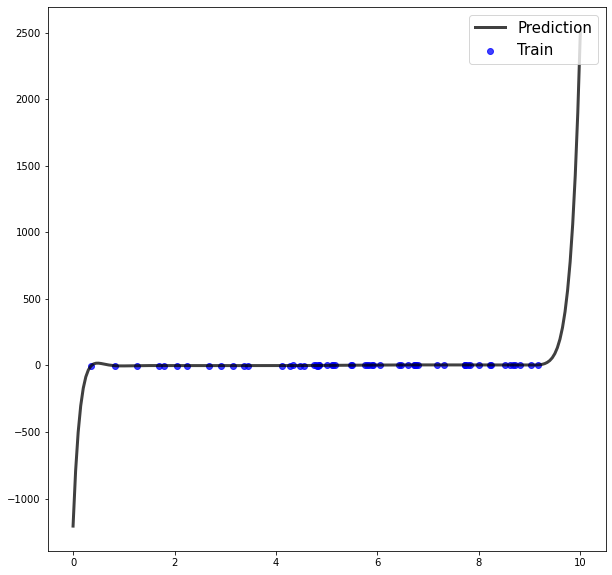

In [ ]:
#parta
degrees = [1, 3, 5, 7, 10, 18]
for degree in degrees: #loop for degrees for run over degrees from 1 to 18
    print(degree)

    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False) #Transoforming Xtr through degreee
    XtrP,params = ml.transforms.rescale(XtrP) #rescalling and getting params
    lr = ml.linear.linearRegress( XtrP, Ytr ) #Training on new Xtr and old Ytr
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params) #using params obtained to transform Xte
    xs = np.linspace(0,10,200) #Again using linspace
    xs = xs[:,np.newaxis]
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params) #Transform linspace
    ys = lr.predict( xsP ) #predicted y for xsP




    f, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(Xtr, Ytr, color='blue', alpha=0.75, label='Train')
    ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction' )


    ax.legend(fontsize=15, loc=1)

    plt.show()

[1.127711955609391, 0.6339652063119634, 0.4042489464459202, 0.31563467398921313, 0.29894797968196857, 0.28045994291281523]
[2.2423492030101246, 0.8616114815450049, 1.0344190205631958, 0.6502246079668108, 0.6090600747645641, 489.02286617707625]
[1, 3, 5, 7, 10, 18]


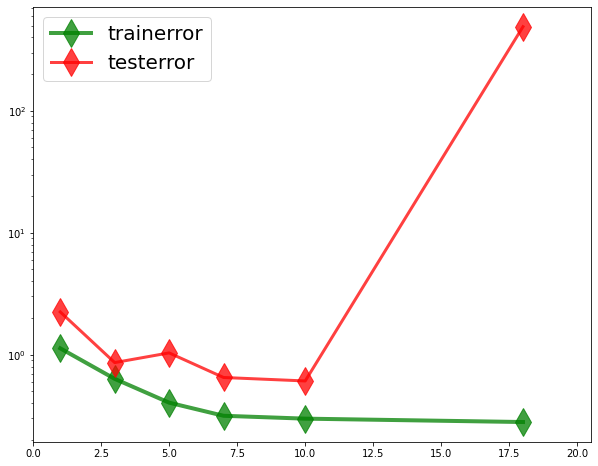

In [ ]:
#partb

trainerror = [] #Create an empty list named as trainerror
testerror = [] #Create an empty list validate error
degrees = [1, 3, 5, 7, 10, 18]
for degree in degrees:

    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress( XtrP, Ytr )
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    xs = np.linspace(0,10,200)
    xs = xs[:,np.newaxis]
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params)
    ys = lr.predict( xsP )

    lr.mse(XtrP,Ytr)
    lr.mse(XteP,Yte)
    trainerror.append(lr.mse(XtrP,Ytr))
    testerror.append(lr.mse(XteP,Yte))

print(trainerror)
print(testerror)
print(degrees)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, trainerror, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='trainerror')
ax.semilogy(degrees, testerror, 'r-',lw=3, marker='d', markersize=20, alpha=0.75,label='testerror')
ax.set_xlim(0, 20.5)
ax.legend(fontsize=20, loc=0)

#partc
Since the test error is minimum for d = 10, and after that it begin to increase I will take d = 10 for this example

#Problem2

##Problem2Part1

[1.2118626629641984, 0.742900575205165, 0.5910703726407965, 0.7335637831327568, 0.7677056905997852, 249815.31588314715]


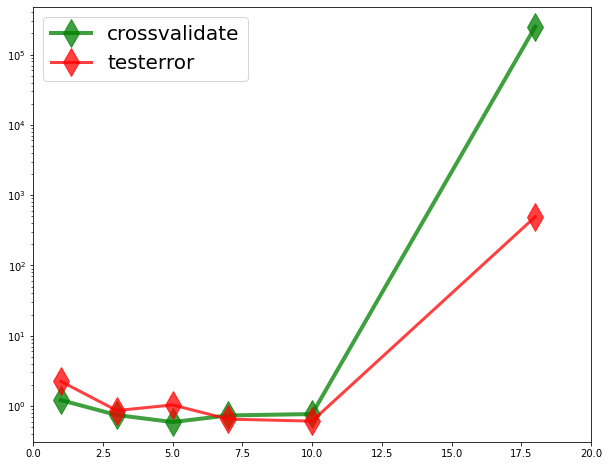

In [ ]:
testerror = [2.242349203010126, 0.8616114815450043, 1.0344190205632802, 0.6502246079652997, 0.6090600748725564, 492.8611030440658]
crossvalidate = [] #An empty array for overall cross validation error
degrees = [1, 3, 5, 7, 10, 18]
nFolds = 5
for degree in degrees:
    J = [] #An empty arrray for cross validation error for each degree for 5folds
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti )
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)
        J.append(lr.mse(XviP, Yvi)) #Appending the error to J
    Error = np.mean(J) #After adding all the errors for division of folds computing a mean of that error particular degree
    crossvalidate.append(Error)
print(crossvalidate) #Adding error for each degree to crossvalidate and printing to get an insight

f, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, crossvalidate, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='crossvalidate')
ax.semilogy(degrees, testerror, 'r-',lw=3, marker='d', markersize=20, alpha=0.75,label='testerror')
ax.set_xlim(0, 20)
ax.legend(fontsize=20, loc=0)

##Problem2 Part2
The MSE estimates from five-fold cross-validation is showing similar trend to the MSEs evaluated on the actual test. The error curve decreases for both Test and Crossvalidation after Ist degree showing the possible solution of underfitting. The curve increases for both Test and crossvalidation after degree 10, means that after degree 10 both cross validation data and actual test data face overfitting.

##Problem2Part3

After looking just on cross validation error, I will recommend degree 5 since there the error is minimum.

##Problem2Part4

1.1795458641310805
0.5984555010978984
2.2195261560637385
0.5910703726407965
0.5963380050012522
0.605825690883641
0.6448758386949992
0.6905669661743796
[1.1795458641310805, 0.5984555010978984, 2.2195261560637385, 0.5910703726407965, 0.5963380050012522, 0.605825690883641, 0.6448758386949992, 0.6905669661743796]


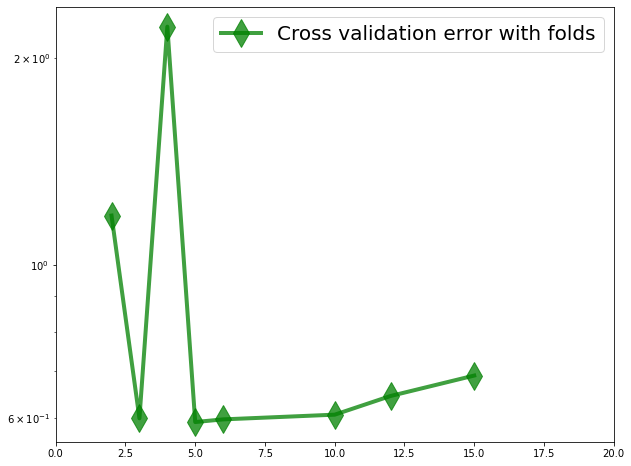

In [ ]:
crossvalidate = []
degree = 5
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
for nfold in nFolds:
    J = []
    for iFold in range(nfold):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nfold, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti )
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)
        XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
        errorcrossvalidate = lr.mse(XviP, Yvi)
        J.append(lr.mse(XviP, Yvi))
    Error = np.mean(J)
    print(Error)
    crossvalidate.append(Error)
print(crossvalidate)

f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogy(nFolds, crossvalidate, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='Cross validation error with folds')
ax.set_xlim(0, 20)




ax.legend(fontsize=20, loc=0)
plt.show()


The cross validation error decreases from n = 2 fold to n = 3 fold but after that it increases from n = 3 to n = 4, it again decreases from n = 4 to n = 5 then shows a slightly constant behavior  until n = 10. The initial fluctations in the error rate can be due to the reason than initial few folds error are average error of smaller number of subets. Then it becomes a little stable because we have average of more number of subsets. After n = 10 folds it increases drastically.  The reason behind this could be that here the training data for the each ith fold is more smaller hence each smaller data set may have seen only a specific label (not multiple labels like a bigger data set) in training and that label could be very different than the label of data on which we have to do prediction (the test data is smaller here too hence may have only limited labels which could be very different than training set labels). Hence we got more error for each individual model hence have a higher error values now.

##Collaborations

I used the help from Ed discussion